In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [3]:
## Read the data source
df = pd.read_excel("C:/Users/El-Wattaneya/Downloads/Superstore_Sales_Dataset.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06 00:00:00,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
## Get to know Your data 
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
## Change data types
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
## Check for duplicates.
df.duplicated().sum()

np.int64(0)

In [10]:
## Get some info about the data 
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9789.000000,9800.000000
mean,4900.500000,2017-04-12 14:24:35.265306368,2017-04-21 19:45:12.489796096,55273.322403,230.769059
min,1.000000,2015-01-02 00:00:00,2015-01-04 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-02 12:00:00,2016-05-08 00:00:00,23223.000000,17.248000
50%,4900.500000,2017-05-30 00:00:00,2017-06-12 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-04-11 00:00:00,2018-05-02 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-05-01 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32041.223413,626.651875


In [11]:
## Convert the whole columns into lower case
df.columns = df.columns.str.lower().str.strip()

In [12]:
## Remove  row id
df = df.drop('row id',axis=1)

In [13]:
## Remove  postal code
df = df.drop('postal code', axis=1)

In [14]:
## Check for duplicates again. 
df.duplicated().sum()

np.int64(1)

In [15]:
## Drop the duplicates. 
df.drop_duplicates(inplace=True)

In [16]:
## removes rows where the "ship date" is earlier than the "order date" 
## resets the index to ensure the DataFrame has a continuous index without gaps.

df.drop(index=df[df["ship date"]<df["order date"]].index.tolist(), inplace =True)
df.reset_index(inplace=True, drop=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.to_excel("C:/Users/El-Wattaneya/Downloads/Superstore2_Sales_Dataset.xlsx", index=False)

In [19]:
df.head()

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940
2,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
3,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976
4,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810


## Univariant

In [20]:
df["order date"].value_counts()

order date
2017-05-09    38
2017-10-11    35
2018-01-12    34
2018-02-12    34
2018-02-09    33
              ..
2016-10-30     1
2015-01-23     1
2016-11-28     1
2015-08-02     1
2018-02-21     1
Name: count, Length: 1072, dtype: int64

In [21]:
## Group Orders based on daily basis 
daily_orders = df.set_index("order date")['order id'].resample('D').count()

In [22]:
## Group Orders based on Monthly basis 
monthly_orders = df.set_index("order date")['order id'].resample('ME').count()

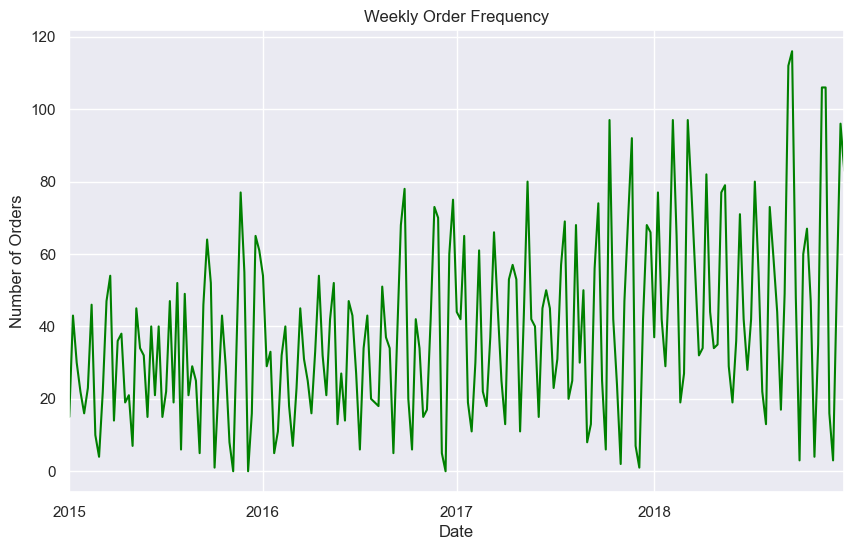

In [23]:
# Plotting weekly orders
weekly_orders = daily_orders.resample('W').sum()

# Plotting weekly orders as a line chart
weekly_orders.plot(figsize=(10, 6), title='Weekly Order Frequency', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

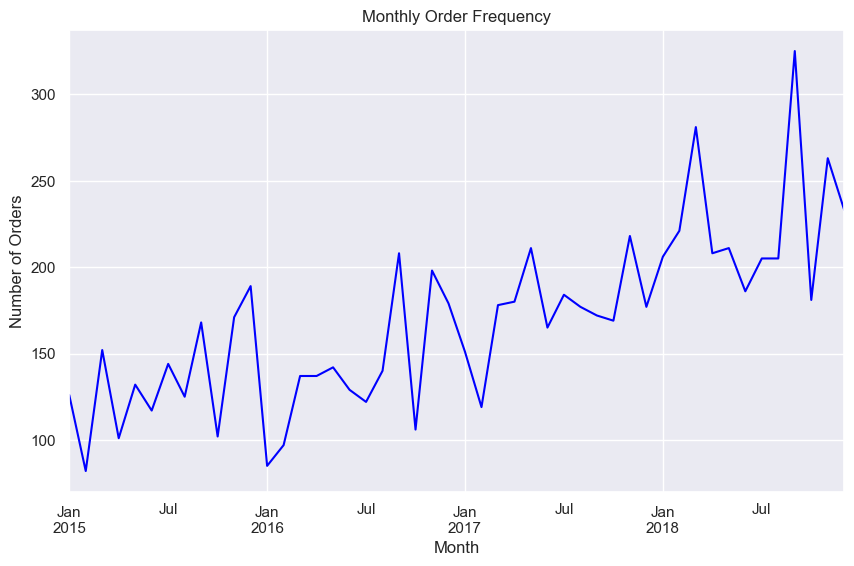

In [24]:
# Plotting monthly orders as a line chart
monthly_orders.plot(figsize=(10, 6), title='Monthly Order Frequency', color='blue')

# Adding labels
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Display the chart
plt.show()

In [25]:
# Get the count of each unique value in the 'ship mode' column
shipping_mode_counts = df['ship mode'].value_counts()

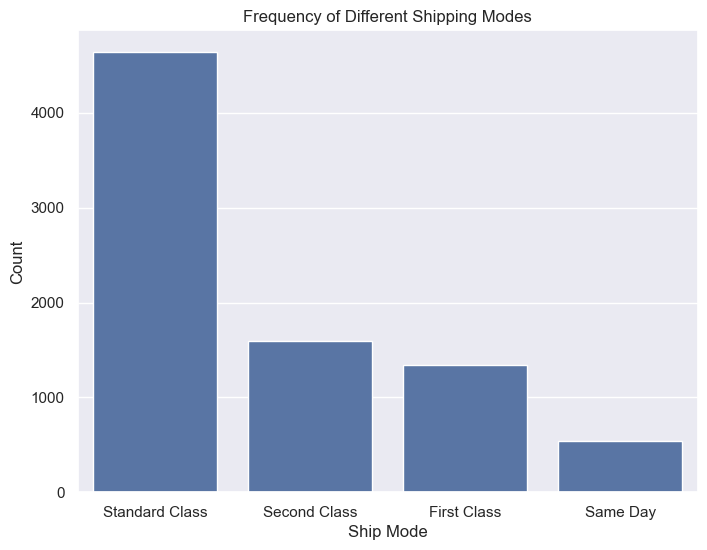

In [26]:


# Set the size of the figure for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn with 'ship mode' categories on the x-axis and their counts on the y-axis
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values)

# Add a title to the plot
plt.title('Frequency of Different Shipping Modes')

# Label the x-axis
plt.xlabel('Ship Mode')

# Label the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


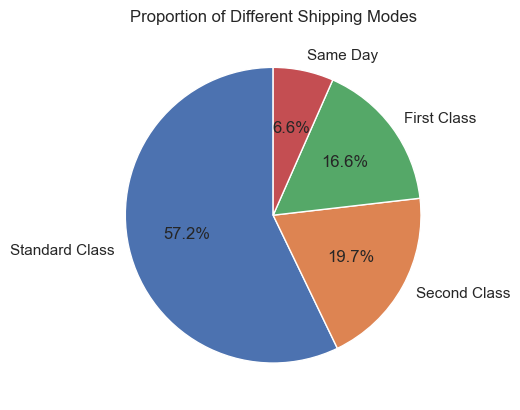

In [27]:
# Create a pie chart using the shipping mode counts
plt.pie(
    shipping_mode_counts,                      # Data to plot (the count of each shipping mode)
    labels=shipping_mode_counts.index,         # Labels for each slice (the shipping modes)
    autopct='%1.1f%%',                         # Display the percentage with 1 decimal place
    startangle=90                              # Start the pie chart at 90 degrees (vertical)
)

# Add a title to the pie chart
plt.title('Proportion of Different Shipping Modes')

# Display the pie chart
plt.show()


In [28]:
# Count the number of occurrences of each unique value in the 'segment' column 
df['segment'].value_counts()


segment
Consumer       4236
Corporate      2441
Home Office    1438
Name: count, dtype: int64

In [29]:
#  visualize the distribution of different segments .


px.pie(data_frame=df, names="segment", title="Distribution of Segments")


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_1256\2676043121.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




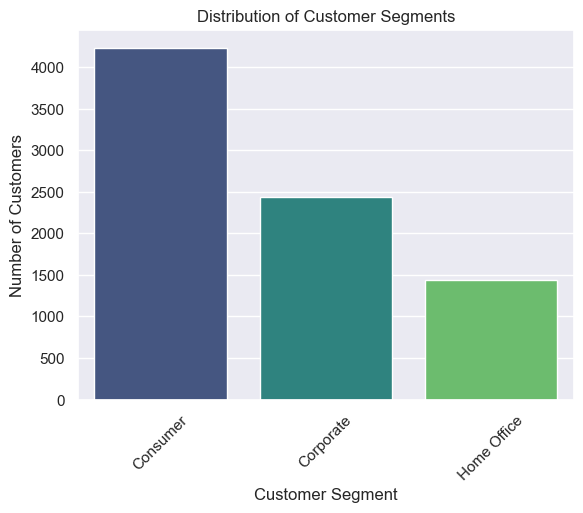

In [31]:
# Count the number of occurrences of each unique value in the 'segment' column 
#  distribution of customer segments.
segment_counts = df['segment'].value_counts()

# 'x' represents the customer segments, 'y' represents the counts.
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

# Set the title and labels for the plot.
plt.title('Distribution of Customer Segments')  # Title of the plot
plt.xlabel('Customer Segment')                   # Label for the x-axis
plt.ylabel('Number of Customers')                # Label for the y-axis

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45)  

plt.show()


In [85]:

# the distribution of states in the dataset.

state_counts = df['state'].value_counts()

# Display the top 10 states with the highest counts.
top_10_states = state_counts.head(10)

top_10_states


state
California        1640
New York           924
Texas              822
Pennsylvania       476
Illinois           396
Ohio               394
Washington         392
Florida            303
Michigan           209
North Carolina     205
Name: count, dtype: int64

In [86]:
# the distribution of states.
state_counts = df['state'].value_counts()

px.bar(data_frame=state_counts, title="Distribution of States")


In [87]:
# the distribution of cities in the dataset.
city_counts = df['city'].value_counts()

top_10_cities = city_counts.head(10)

top_10_cities


city
New York City    762
Los Angeles      599
Philadelphia     435
San Francisco    415
Seattle          333
Houston          320
Chicago          247
Columbus         189
San Diego        147
Dallas           125
Name: count, dtype: int64

In [88]:
# distribution of regions.
region_counts = df['region'].value_counts()

# Display the counts of each region.
region_counts


region
West       2603
East       2290
Central    1891
South      1331
Name: count, dtype: int64

In [89]:
# distribution of regions in the dataset.
region_counts = df['region'].value_counts()

px.bar(data_frame=region_counts, title="Distribution of Regions")


In [90]:
# descriptive statistics for the 'sales'.

sales_statistics = df["sales"].describe()

# Display the descriptive statistics for the 'sales' column.
sales_statistics


count     8115.000000
mean       234.933831
std        663.131112
min          0.444000
25%         17.220000
50%         54.660000
75%        211.168000
max      22638.480000
Name: sales, dtype: float64

In [92]:
# Calculate key statistics (minimum, quartiles, IQR, and bounds) for the 'sales' column to analyze data distribution and detect outliers.
min = df["sales"].min()
q1 = df["sales"].quantile(0.25)
q2 = df["sales"].median()
q3 = df["sales"].quantile(0.75)
IQR = q3 - q1
LB = q1 - (1.5 * IQR)
UB = q3 + (1.5 * IQR)

# Print the calculated statistics, including min, quartiles, IQR, and bounds for outliers.
print(f' min = {min}, q1 = {q1}, q2 = {q2} , q3 = {q3}, IQR = {IQR} ,LB = {LB}, UB = {UB}')


 min = 0.444, q1 = 17.22, q2 = 54.66 , q3 = 211.168, IQR = 193.948 ,LB = -273.702, UB = 502.09000000000003


In [93]:
# visualize the distribution of the 'sales'. 
# identify the central tendency, spread, and potential outliers in the sales data.
px.box(data_frame=df, x="sales")


In [94]:
# Count the occurrences of each unique value in the 'category' column 
# analyze the distribution of categories.
category_counts = df["category"].value_counts()

# Display the counts of each category.
category_counts


category
Office Supplies    4895
Furniture          1726
Technology         1494
Name: count, dtype: int64

In [95]:
# the distribution of categories
px.pie(data_frame= df, names= "category", title= "Distribution of categories")

In [96]:
# identify all distinct sub-categories present in the dataset.
unique_sub_categories = df["sub-category"].unique()

# Display the unique sub-categories.
unique_sub_categories


array(['Bookcases', 'Chairs', 'Paper', 'Binders', 'Appliances', 'Storage',
       'Art', 'Tables', 'Accessories', 'Furnishings', 'Envelopes',
       'Phones', 'Labels', 'Fasteners', 'Supplies', 'Machines', 'Copiers'],
      dtype=object)

In [97]:
# visualize the distribution of sub-categories.
px.bar(data_frame=df["sub-category"].value_counts(), title="Distribution of Sub-Categories")


## Bivariant

In [45]:
df.columns

Index(['order id', 'order date', 'ship date', 'ship mode', 'customer id',
       'customer name', 'segment', 'country', 'city', 'state', 'region',
       'product id', 'category', 'sub-category', 'product name', 'sales'],
      dtype='object')

## Sales vs other columns

In [46]:
df.groupby("segment", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,segment,sales
0,Consumer,963546.6011
1,Corporate,583568.3412
2,Home Office,359373.0959


In [47]:
segment_sales = df.groupby('segment', as_index=False)['sales'].sum()

px.pie(data_frame= segment_sales , names= "segment" , values= "sales", title="Total sales of each segment")

In [48]:
df.groupby("sub-category", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,sub-category,sales
5,Chairs,269703.6200
13,Phones,265709.1220
3,Binders,177701.3510
11,Machines,174562.4070
14,Storage,171935.1840
16,Tables,166092.4780
0,Accessories,136945.7780
6,Copiers,131548.4480
4,Bookcases,92735.6872
1,Appliances,90918.7130


In [49]:
SubCategory_sales = df.groupby('sub-category', as_index=False)['sales'].sum()

px.bar(data_frame= SubCategory_sales , x = "sub-category" , y = "sales", title="Total sales of each Sub_catergory")

In [50]:
df.groupby("category", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,category,sales
2,Technology,708765.7550
0,Furniture,602107.0672
1,Office Supplies,595615.2160


In [51]:
category_sales = df.groupby('category', as_index=False)['sales'].sum()

px.pie(data_frame= category_sales ,names= "category" , values ="sales", title="Total sales of each category")


In [52]:
df.groupby("region", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,region,sales
3,West,600531.3930
1,East,561932.2770
0,Central,410933.1852
2,South,333091.1830


In [53]:
region_sales = df.groupby('region', as_index=False)['sales'].sum()

px.bar(data_frame= region_sales , x = "region" , y = "sales", title="Total sales of each region")

In [54]:
px.pie(data_frame= region_sales ,names= "region" , values ="sales", title="Total sales of each Region")


In [55]:
df.groupby("state", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,state,sales
3,California,378264.6310
30,New York,266659.0490
41,Texas,142792.9922
45,Washington,113041.7480
36,Pennsylvania,94907.7490
8,Florida,76418.2030
20,Michigan,62159.1780
11,Illinois,59926.9750
33,Ohio,58573.4170
44,Virginia,57811.0800


In [56]:
def plots(columnname , top5= False):
    if columnname not in df.columns:
        print(f"Column '{columnname}' not found in DataFrame.")
        return
    prop = df.groupby(columnname , as_index=False)["sales"].sum()
    prop["proportion"]= ( prop.sales / df.sales.sum())*100
    prop = prop.sort_values("proportion" , ascending=False)
    print("Distribution of all total amount values " , prop.sales.describe() )
    if top5:
        prop = prop.head(5)
    

    fig1 = px.bar(data_frame= prop , x = columnname , y = "sales")
    fig2 = px.pie(data_frame= prop ,names= columnname , values ="sales")

    fig1.show()
    fig2.show()


In [57]:
plots("state" , True)

Distribution of all total amount values  count        49.000000
mean      38907.919147
std       67298.175790
min          33.920000
25%        7264.594000
50%       19632.920000
75%       35138.030000
max      378264.631000
Name: sales, dtype: float64


In [58]:
plots("city", True)

Distribution of all total amount values  count       506.000000
mean       3767.762921
std       14489.507063
min           1.392000
25%         204.778000
50%         789.593000
75%        2515.295500
max      219385.071000
Name: sales, dtype: float64


In [59]:
df.groupby("product name", as_index=False)["sales"].sum().sort_values("sales", ascending=False)

,product name,sales
399,Canon imageCLASS 2200 Advanced Copier,61599.824
640,Fellowes PB500 Electric Punch Plastic Comb Bin...,22877.820
436,Cisco TelePresence System EX90 Videoconferenci...,22638.480
776,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
775,HON 5400 Series Task Chairs for Big and Tall,18085.284
...,...,...
132,Alliance Rubber Bands,5.040
1489,Stockwell Gold Paper Clips,3.680
1393,Sanford Pocket Accent Highlighters,3.200
1493,Storex Flexible Poly Binders with Double Pockets,3.168


In [60]:
plots("product name", True)

Distribution of all total amount values  count     1827.00000
mean      1043.50741
std       2575.54467
min          1.62400
25%         81.26800
50%        246.64800
75%        954.88400
max      61599.82400
Name: sales, dtype: float64


In [61]:
plots('customer name', True)

Distribution of all total amount values  count      791.000000
mean      2410.225080
std       2468.881291
min          2.025000
25%        829.108000
50%       1718.290000
75%       3175.553000
max      24516.600000
Name: sales, dtype: float64


## Date vs other columns


In [62]:
df.columns

Index(['order id', 'order date', 'ship date', 'ship mode', 'customer id',
       'customer name', 'segment', 'country', 'city', 'state', 'region',
       'product id', 'category', 'sub-category', 'product name', 'sales'],
      dtype='object')

In [63]:
date_total = df[["order date" , "sales"]]
date_total = date_total.set_index("order date")


In [64]:
px.line(data_frame= df.sort_values("order date"), x="order date", y="sales")

In [65]:
date_country = df[["order date", "city"]]
date_country = date_country.set_index("order date")
date_country = date_country.city.resample(rule="1ME").nunique()
date_country.head()

order date
2015-01-31    43
2015-02-28    33
2015-03-31    47
2015-04-30    30
2015-05-31    40
Freq: ME, Name: city, dtype: int64

In [66]:
px.line(data_frame=date_country ,y= "city")

In [67]:
date_state = df[["order date", "state"]]
date_state = date_state.set_index("order date")
date_state = date_state.state.resample(rule="1ME").nunique()
date_state.head()

order date
2015-01-31    26
2015-02-28    16
2015-03-31    24
2015-04-30    19
2015-05-31    21
Freq: ME, Name: state, dtype: int64

In [68]:
px.line(data_frame= date_state, y="state")

In [69]:
df[['ship date',"order date"]]

,ship date,order date
0,2017-11-11,2017-08-11
1,2017-11-11,2017-08-11
2,2018-04-20,2018-04-15
3,2017-10-12,2017-05-12
4,2016-11-26,2016-11-22
...,...,...
8110,2015-05-23,2015-05-21
8111,2015-05-23,2015-05-21
8112,2015-05-23,2015-05-21
8113,2015-05-23,2015-05-21


In [70]:
df[['ship date',"order date"]].dtypes

ship date     datetime64[ns]
order date    datetime64[ns]
dtype: object

In [71]:
df['DaysUntilShipped'] = (df['ship date'] - df['order date'])
df.head(5)

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales,DaysUntilShipped
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92 days
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92 days
2,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5 days
3,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153 days
4,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4 days


In [72]:
df.groupby("ship mode", as_index=False)["DaysUntilShipped"].mean().sort_values("DaysUntilShipped", ascending=False)

,ship mode,DaysUntilShipped
3,Standard Class,52 days 19:34:32.445019405
2,Second Class,36 days 05:23:42.417031935
0,First Class,26 days 07:28:55.714285714
1,Same Day,0 days 21:24:10.746268656


# Multi_variant

## sales of esch category for each region


In [100]:
df_pivot = df.pivot_table(values='sales', index='region', columns='category', aggfunc='sum')
df_pivot['TotalSales'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='TotalSales', ascending=False)
df_pivot


category,Furniture,Office Supplies,Technology,TotalSales
region,,,,
West,210330.1520,184245.247,205955.994,600531.3930
East,159636.8850,167280.968,235014.424,561932.2770
Central,133515.9932,138029.181,139388.011,410933.1852
South,98624.0370,106059.820,128407.326,333091.1830


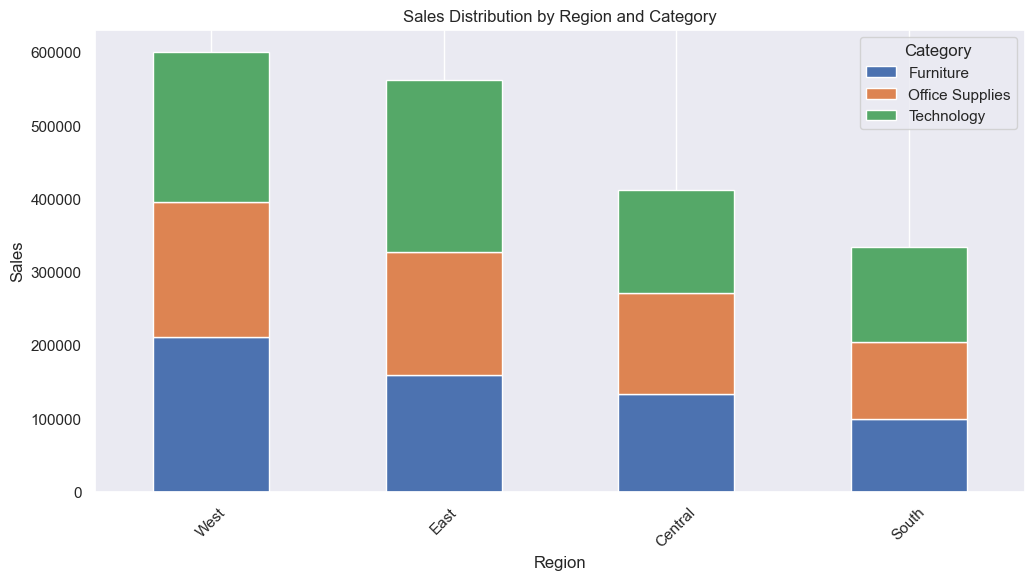

In [101]:
# visualize sales by category within each region 
df_pivot.drop(columns='TotalSales').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales Distribution by Region and Category')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Category')  # Add legend for categories
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

In [102]:
# Create a new column 'quarter' in the DataFrame that represents the quarter of the year for each order date. 
df['quarter'] = df['order date'].dt.to_period('Q')


In [103]:
# Create a new column 'Year' in the DataFrame that represents the year for each order date. 
df['order_year'] = df['order date'].dt.to_period('Y')

###  The Regions with the highest sales growth over time

In [139]:

# Pivot table creation
df_pivot = df.pivot_table(values='sales', index='order_year', columns='region', aggfunc='sum')
df_pivot.index = pd.to_datetime(df_pivot.index.astype(str), format='%Y').to_period('Y').to_timestamp()
df_pivot['TotalSales'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='TotalSales', ascending=False)

print(df_pivot)


region          Central        East        South         West   TotalSales
order_year                                                                
2018-01-01  116279.9342  178362.917  104587.8925  219174.0435  618404.7872
2017-01-01  123981.6712  152044.041   72198.6630  153519.5500  501743.9252
2015-01-01   91651.4174  104963.763   94150.3710  112050.7100  402816.2614
2016-01-01   79020.1624  126561.556   62154.2565  115787.0895  383523.0644


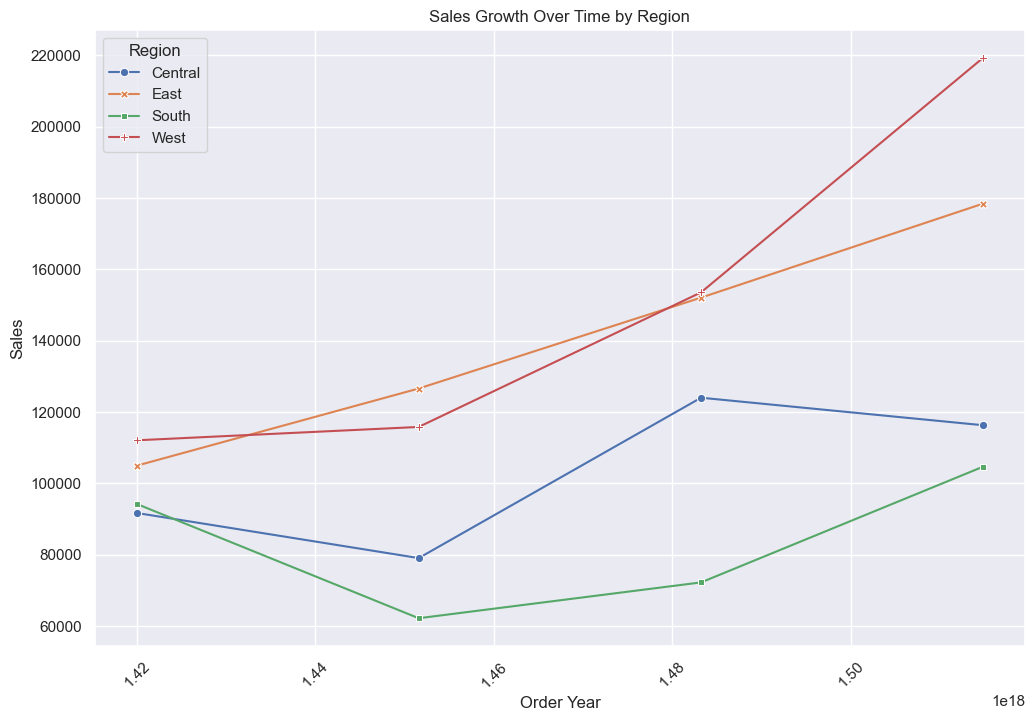

In [140]:

# The Regions with the highest sales growth over time
df_pivot.index = df_pivot.index.astype(int)
region_columns = [col for col in df_pivot.columns if col != 'TotalSales']
df_regions_only = df_pivot[region_columns]

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_regions_only, markers=True, dashes=False)
plt.title('Sales Growth Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### The highest sales of segments that ordered over the time


In [77]:
df.groupby(['segment', 'order_year'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

,segment,order_year,sales
3,Consumer,2018,284921.0645
2,Consumer,2017,240918.3772
1,Consumer,2016,223416.0443
0,Consumer,2015,214291.1151
7,Corporate,2018,205307.7608
6,Corporate,2017,172653.4740
11,Home Office,2018,128175.9619
4,Corporate,2015,108851.5255
5,Corporate,2016,96755.5809
10,Home Office,2017,88172.0740


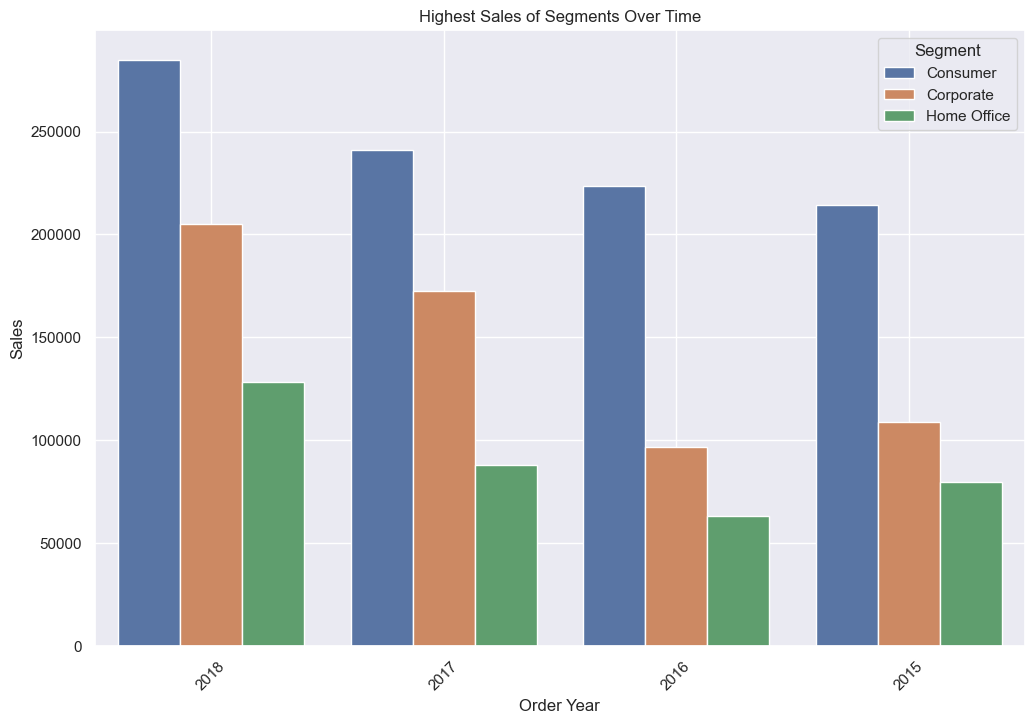

In [157]:
# The highest sales of segments that ordered over the time

# Grouping and sorting as per your code
df_grouped = df.groupby(['segment', 'order_year'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='order_year', y='sales', hue='segment', data=df_grouped)
plt.title('Highest Sales of Segments Over Time')
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)
plt.show()


### The highest ship mode with sales over time 

In [144]:
df.groupby(['order_year','ship mode'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

,order_year,ship mode,sales
15,2018,Standard Class,313671.1826
11,2017,Standard Class,300985.3388
3,2015,Standard Class,249113.0944
7,2016,Standard Class,224193.7716
12,2018,First Class,132003.4546
14,2018,Second Class,124263.8980
10,2017,Second Class,97933.4266
2,2015,Second Class,81393.3405
6,2016,Second Class,76280.3744
8,2017,First Class,71373.7168


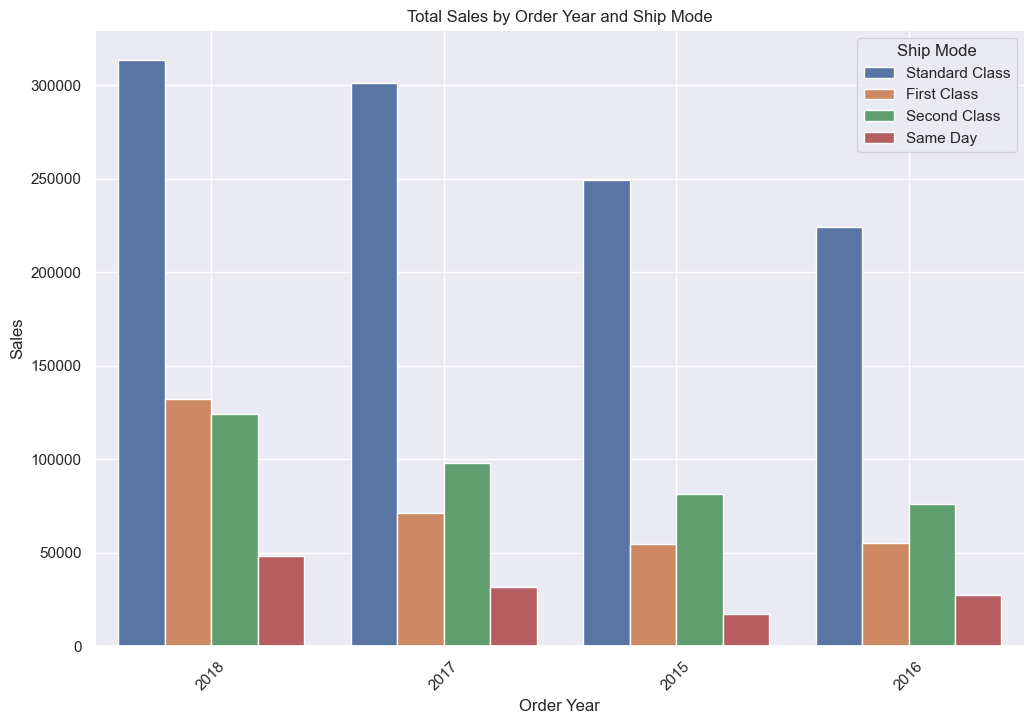

In [148]:
# The highest ship mode with sales over time 
# Grouping and sorting as per your code
df_grouped = df.groupby(['order_year', 'ship mode'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='order_year', y='sales', hue='ship mode', data=df_grouped)
plt.title('Total Sales by Order Year and Ship Mode')
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Ship Mode')
plt.grid(True)
plt.show()


### sales of each sub-category for each region

In [81]:
df_pivot = df.pivot_table(values='sales', index='sub-category', columns='region', aggfunc='sum')
df_pivot['Totalsalesforeachsubcategory'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='Totalsalesforeachsubcategory', ascending=False)
df_pivot


region,Central,East,South,West,Totalsalesforeachsubcategory
sub-category,,,,,
Chairs,68820.6110,74349.105,39738.144,86795.760,269703.6200
Phones,53932.0540,85653.090,49039.234,77084.744,265709.1220
Binders,48741.8840,47252.808,31907.966,49798.693,177701.3510
Machines,24454.0450,59061.370,53890.960,37156.032,174562.4070
Storage,38790.0500,50865.238,26589.382,55690.514,171935.1840
Tables,32743.8510,28407.124,34876.711,70064.792,166092.4780
Accessories,27862.2680,41200.418,20777.246,47105.846,136945.7780
Copiers,33139.6440,49099.546,4699.886,44609.372,131548.4480
Bookcases,20613.3892,35349.142,9400.582,27372.574,92735.6872


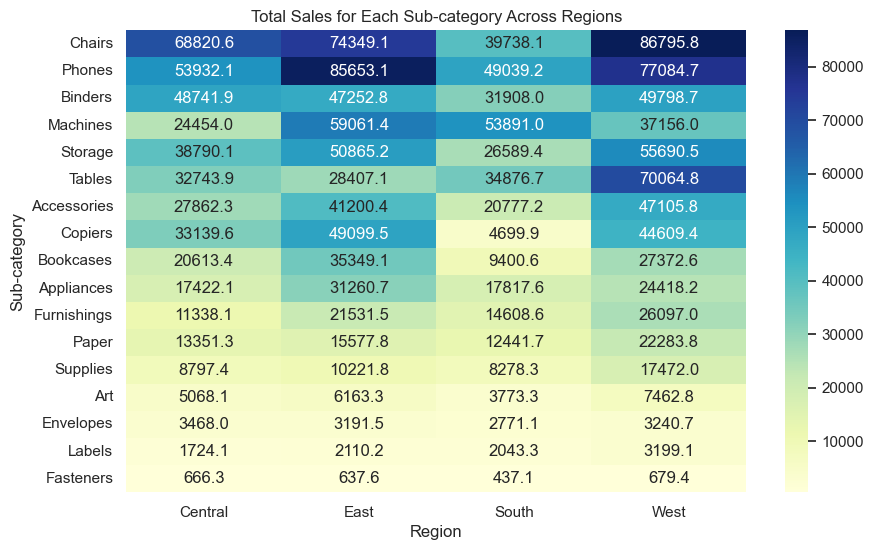

In [151]:
# sales of each sub-category for each region
df_pivot = df.pivot_table(values='sales', index='sub-category', columns='region', aggfunc='sum')
df_pivot['Totalsalesforeachsubcategory'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='Totalsalesforeachsubcategory', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot.drop(columns='Totalsalesforeachsubcategory'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Total Sales for Each Sub-category Across Regions')
plt.xlabel('Region')
plt.ylabel('Sub-category')
plt.show()
